# Preprocess corpus

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import os
os.chdir('./Corpus')
ps = PorterStemmer()
stopwords_english = set(stopwords.words('english'))

In [2]:
# Load Hong Kong Protest from Chinese newspaper
china_daily = pd.read_csv('China Daily.csv')
people_daily = pd.read_csv('People\'s Daily.csv')
xinhua_agent = pd.read_csv('Xinhua Agent.csv')
# Load Hong Kong Protest from US newspaper
Wall_Street_Journal = pd.read_csv('Wall Street Journal.csv')
Washington_post = pd.read_csv('Washington Post.csv')
New_York_Times = pd.read_csv('New York Times.csv')

In [3]:
# Combine the Chinese newspaper corpus
Chinese_newspaper = pd.concat([china_daily,people_daily,xinhua_agent],axis=0,ignore_index=True)
# Combine the Hong Kong newspaper corpus
US_newspaper = pd.concat([Wall_Street_Journal,New_York_Times,Washington_post],axis=0,ignore_index=True)

In [24]:
# Drop missing value
CN = Chinese_newspaper.dropna().reset_index(drop=True)
US = US_newspaper.dropna()[:-3].reset_index(drop=True)

In [25]:
print(CN.shape)
print(US.shape)

(549, 2)
(549, 2)


# Sentiment Analysis - Vader

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [28]:
sid = SentimentIntensityAnalyzer()
for ind in range(len(CN)):
    print(sentence)
    sentence = CN.loc[ind,"text"]
    ss = sid.polarity_scores(sentence)
    CN.loc[ind,"Sentiment Score"] = ss['compound']
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print("=====================================================================================================================")
    print()

Policeman hospitalized with leg burns; large groups of residents thank officers
Separate protests were held in various parts of Hong Kong on Sunday as the demonstrations entered their ninth week, while large groups of Hong Kong residents visited several police stations over the weekend to express their firm support and respect for the police force.
On Sunday, a radical protestor hit a police officer with a gasoline bomb, and Commissioner of Police Lo Wai-chung later visited the officer, who had been hospitalized for burn wounds on his legs.
A resident surnamed Chan, who visited Kwai Chung Police Station with his wife and son on Saturday, said: "The police have been working really hard to safeguard social order. We came here to show our support." The boy gave the police a handwritten card.
Carrie Lam Cheng Yuet-ngor, chief executive of the Hong Kong Special Administrative Region, visited on Friday the Wong Tai Sin Police Station and dormitory, which had been attacked by radical proteste

compound: -0.2272, 
neg: 0.131, 
neu: 0.732, 
pos: 0.137, 

Speaking publicly for the first time about the turmoil in the Hong Kong Special Administrative Region, President Xi Jinping said that ending the violence and chaos and restoring order are the most important tasks for the SAR government at present.
His remarks came after he was updated on the situation in the SAR by Chief Executive Carrie Lam Cheng Yuet-ngor, when they met on the sidelines of the second China International Import Expo in Shanghai on Monday.
Countering rumors that the central authorities have lost confidence in her government's ability to quell the unrest, he said they had a "high degree of trust" in her administration being able to stabilize the situation in the SAR. Urging her to be firm, he said that stopping the violence and punishing the perpetrators in accordance with the law is the way to safeguard the well-being of ordinary people in Hong Kong; the majority who just want to get on with their lives.
What 

compound: -0.9992, 
neg: 0.23, 
neu: 0.683, 
pos: 0.087, 

Fu Guohao, a Global Times website reporter who was illegally detained, restrained with plastic zip ties, verbally abused and beaten by protesters at the Hong Kong International Airport on Tuesday, was discharged from a Hong Kong hospital at noon on Wednesday.
Fu spoke to the media after his discharge from Princess Margaret Hospital in the New Territories of the Hong Kong Special Administrative Region. Though he had some bruises on his face, Fu said he did not suffer serious injury.
Fu thanked the public for their care and concern and said he still loves Hong Kong.
Fu was dispatched by Beijing-based Global Times to cover the mass protests in Hong Kong. The sit-in at the airport that started on Friday virtually paralyzed the operations of the international airport for two days.
Fu, who had been wearing a yellow press vest, had his arms and legs restrained with plastic ties for almost an hour and also had flashlights shined in his

compound: -0.9646, 
neg: 0.084, 
neu: 0.868, 
pos: 0.048, 

Ex-legislator targets US, 'pro-Taiwan independence' forces and liberal studies
The United States and "pro-Taiwan independence" forces are to blame for recent turmoil in Hong Kong, according to a former Hong Kong member of the Standing Committee of the National People's Congress, who said links between the violent vandals and external forces have surfaced.
The observation by Rita Fan Hsu Lai-tai, who served in the nation's top legislature, came after repeated protests over a now-suspended extradition bill in the past two months.
The ulterior motive is to throw Hong Kong into major turmoil, the former president of the Legislative Council told China Daily in an exclusive interview on Thursday.
"When Hong Kong is in a chaotic state, the US can unsettle China, while people from Taiwan in favor of independence will say 'one country, two systems' is not applicable to Taiwan because it is a failure in Hong Kong," Fan said.
"Due to the

compound: -0.9885, 
neg: 0.09, 
neu: 0.871, 
pos: 0.039, 

George Galloway, an outspoken former member of the United Kingdom's Parliament, said how the central and Hong Kong government officials handle the situation in the former British colony is none of the UK's business.
"Hong Kong is no more Britain's business than is the business of Slovakia or Romania. We are just another foreign country. For the British state, they have never accepted in their heart that their empire has gone and Hong Kong is (part of) China," Galloway said in an interview with China Daily in Hong Kong.
"They had to make the diplomatic withdrawal that they did in 1997 because they ran out of the ransom in New Territories, and they have tried ever since to keep an as large (a) foothold on the people, the society and the economy in Hong Kong as they possibly could," he added.
Galloway drew international attention for his combative performance when facing a committee of senior United States politicians as part of t

compound: -0.8779, 
neg: 0.068, 
neu: 0.879, 
pos: 0.054, 

China asked the United States on Thursday to clarify media reports about a US official's meeting with major "Hong Kong independence" activists, urging it to stop sending "wrong signals" to the violent lawbreakers in the country's special administrative region.
The Office of the Commissioner of the Ministry of Foreign Affairs in the Hong Kong Special Administrative Region urgently summoned a senior official at the US Consulate General, urging US officials to immediately make a clean break from anti-China forces who stir up trouble in Hong Kong, to refrain from meddling in Hong Kong affairs and to avoid going further down the wrong path, according to a statement on the office's website.
Julie Eadeh, a political counselor at the US Consulate General in Hong Kong, was reported to have met Hong Kong separatist leaders in a hotel in Hong Kong on Tuesday. They include Joshua Wong Chi-fung, one of the leaders of the 2014 Occupy Moveme

compound: -0.9877, 
neg: 0.145, 
neu: 0.766, 
pos: 0.089, 

Chinese-American actress Liu Yifei, who plays Mulan in Disney’s upcoming live-action remake of Mulan, is under attack for expressing her support for police in Hong Kong, who have struggled to maintain public order after violent protests broke out in the city.

 On her personal Weibo account, the popular actress reposted and commented on a People’s Daily post which shamed the rioters in Hong Kong for their extreme violence. The post says in English, “What a shame for Hong Kong” and includes the now-viral quote by a Global Times reporter who was tied up and beaten by radical protestors at Hong Kong’s airport: “I support the Hong Kong police. You can beat me up now.”

 The original post has received roughly 2.8 million likes and has been reposted close to 7.8 million times as of press time. In her post, the actress included the popular hashtag: “I also support the Hong Kong police.” And her voice is not alone. It adds to the grow

compound: -0.9986, 
neg: 0.207, 
neu: 0.7, 
pos: 0.093, 

Hong Kong’s Chief Executive Carrie Lam Cheng Yuetngor speaks at a news conference in Hong Kong on Monday. Lam said recent chaos has pushed the city to the “verge of a dangerous situation”, but the government will be resolute in ensuring public order. CHINA DAILY

 Carrie Lam Cheng Yuet-ngor, Hong Kong's chief executive, said on Monday that protesters' sustained acts of disruption are pushing "our city, the city we all love and many helped to build, to the verge of a dangerous situation".

 Lam, speaking at a news conference, pledged resolute action to maintain law and order and restore confidence. She said the protests have gone beyond the issue of a now-shelved extradition amendment bill and now are aimed at destabilizing the special administrative region at the cost of the stability of 7 million residents' lives and futures.

 Monday's problems were caused by direct disruption by protesters as well as a general strike in the c

compound: -0.9989, 
neg: 0.226, 
neu: 0.716, 
pos: 0.058, 

Travelers weave their way through protesters in Terminal 1 of Hong Kong International Airport on Monday. Airport Authority Hong Kong canceled Monday's remaining flights around 4 pm. [Photo/China Daily]

 149 arrested as unlawful protests continue, violent acts spread over weekend in SAR

 Violence has escalated to a point that smacks of terrorism in the Hong Kong Special Administrative Region, China's top authority on the city's affairs warned on Monday.

 In Beijing, Yang Guang, a spokesman for the Hong Kong and Macao Affairs Office of the State Council, said radical protesters have repeatedly attacked police officers in the past few days and have committed serious violent crimes. Such violence has begun to show the "first signs of terrorism", Yang said.

 Yang strongly condemned protesters who threw gasoline bombs at police officers on Sunday night.

 A very small number of rioters hurled the bombs at police officers at poli

compound: -0.0772, 
neg: 0.093, 
neu: 0.813, 
pos: 0.094, 

BEIJING, Aug. 21 -- Over the past two months, many opposition figures have been stirring up unlawful rallies, chaos and instability in Hong Kong.

 Among those was Martin Lee Chu-ming, a diehard proxy for foreign anti-China forces.

 A revisit of what Lee has said and done over the past decades showed his long-time antagonism to his own country.

 Before Hong Kong's return to China, Lee actively supported policies by British authorities and begged for external forces' interference.

 Early on in 1988 when he visited the United States, Lee said: "I believe many will think it is the best that Hong Kong remains a British colony for another 100 years."

 He even advised the U.S. Congress in 1990 that the United States should enact a set of special policies based on the political wills of a fraction of Hong Kong people.

 During another visit to the United States in 1996, Lee again begged for the U.S. side to meddle in Hong Kong af

compound: 0.9962, 
neg: 0.078, 
neu: 0.768, 
pos: 0.153, 

HONG KONG, Oct. 25 (Xinhua) -- Global observers hit out at the so-called Hong Kong Human Rights and Democracy Act of 2019 and other related acts pushed by U.S. lawmakers, stressing the bills were groundless and biased and could only compound the prolonged unrest in Hong Kong.
NEEDLESS BILLS
David Gosset, a French expert and founder of the Europe-China Forum, thought the acts were groundless. "In Hong Kong, a highly developed Chinese region, the fundamental rights are well protected."
It is ongoing violent and extremist acts that damaged people's rights and should be condemned, Gosset said.
"I think it's a very unwise move by the United States congress, which is not going to help with the matters, but only provoke, making things worse for Hong Kong in the long run," said Kishore Mahbubani, distinguished fellow at Asia Research Institute of National University of Singapore.
The Hong Kong-related bills still require the support of

compound: -0.986, 
neg: 0.151, 
neu: 0.812, 
pos: 0.037, 

HONG KONG, Oct. 31 (Xinhua) -- The government of China's Hong Kong Special Administrative Region (HKSAR) strongly condemned the violent acts of the rioters participating in unauthorized assemblies Thursday night, saying such "illegal acts disrupted social order and jeopardized people's safety."
"Rioters once again took the opportunity to block roads, seriously disrupting traffic. Some people hurled petrol bombs with no regard to the safety of others," said a spokesman for the HKSAR government.
In the evening, large groups of protesters flooded Mong Kok district and some damaged the exits of mass transit railway (MTR) and traffic lights. Around 9:30 p.m. local time, rioters escalated their violent protests, built barricades and set them ablaze.
In response to the drastically deteriorating situation, police officers "used minimum necessary force, including tear gas, to effect dispersal," the Hong Kong police said in a statement.


compound: -0.9973, 
neg: 0.363, 
neu: 0.622, 
pos: 0.015, 

HONG KONG, Aug. 27 (Xinhua) -- Hong Kong police said on Tuesday they had arrested another 13 suspects related to illegal activities in the past two months.
Police said 11 men and two women, aged 19 to 40, had been arrested in the past few days for offences including unlawful assembly, criminal damage, access to computer with criminal or dishonest intent, and possession of offensive weapons.
So far, more than 800 arrests had been made since June, when the protest first broke out.
Speaking at the daily press conference, Tse Chun-chung, chief superintendent of police public relations branch, said violence by radical protesters had escalated from setting up roadblocks to deliberately hurting police officers with deadly weapons, including steel balls, bricks, slingshots and petrol bombs.
Apart from targeting police officers, violence by radical protesters also hurt ordinary residents and journalists, Tse said.
"No illegal or violen

compound: -0.9976, 
neg: 0.162, 
neu: 0.737, 
pos: 0.101, 

HONG KONG, Aug. 10 (Xinhua) -- Large groups of Hong Kong people visited several police stations in Hong Kong Saturday to express their firm support for and utmost respect to the police force.
The scene stood in stark contrast to the chaotic and violent besieges of police stations by black-clad protesters on many nights over the past weeks.
"The police have been working really hard to safeguard social order. We came here to show our support," said a resident surnamed Chan, who visited Kwai Chung Police Station with his wife and son. The boy gave the police a hand-written card as a gift.
"I hope our children can learn to love peace and how to act as righteous people," Chan said. "I also want to see society restore order and for there to be no more violence."
Local business leader Raymond Tsoi Chi-chung and his friends visited Central Police Station to express their support to the "core force for protecting Hong Kong."
"Recent vi

compound: 0.7549, 
neg: 0.081, 
neu: 0.824, 
pos: 0.095, 

HONG KONG, Aug. 15 (Xinhua) -- The Hong Kong International Airport was bustling as usual on Thursday, but white plastic fences erected outside the terminal building and long lines of passengers waiting for check of their flight booking information and ID cards served as a reminder that protesters had disrupted operation of the airport earlier this week.
Robert Fairhead, 66, and his wife Lisa were the witnesses of the illegal, violent rallies at one of world's busiest airport.
The Australian couple sipped coffee on a bench of the arrivals hall Thursday afternoon, waiting for their outbound flight due in the evening. Meters away, a stream of air travelers passed by while a group of uniformed pupils, led by their teachers, were heading for the airport express.
"We have been stranded for two days and can finally back home tonight," Fairhead said. They arrived in Hong Kong from Paris on Tuesday and planned to fly to Australia to tak

pos: 0.06, 

by Xinhua writer Yang Dingdu
HONG KONG, Aug. 29 (Xinhua) -- Multiple videos of a boy leading protestors in shouting slogans on the streets of Hong Kong have become a cliche of protest publicity. Having a frenzied crowd follow a child's innocent voice may be quite a spectacle. But the question is: Did the boy really understand what he was doing?
The nefarious forces behind the prolonged protests in Hong Kong have been inciting teenagers, students and even children to charge onto the streets for their agenda. Among the suspects arrested for violent activities since June, many were young faces. One was only 12 years old.
As the new semester draws near on Sept. 1, organizers are openly calling for students to go on school strikes. Pamphlets urging students to walk out of class are everywhere.
Young people are the future of Hong Kong. Their voice carries weight and must be heard. Political schemers, however, have shamelessly misguided some young people's goodwill and passion in

In [29]:
CN.head()

title  \
0  Violence flares as HK protests start 9th week   
1           Bruce Lee's broad appeal still holds   
2             HK protests weighing on job market   
3          HK needs to restore public order, now   
4       US act adding fuel to the Hong Kong fire   

                                                text  Sentiment Score  
0  Policeman hospitalized with leg burns; large g...          -0.9889  
1  It's a reflection of Bruce Lee's transcendent ...           0.9213  
2  Experts say it's harder to lure overseas talen...           0.9866  
3  There is a dreary dismal familiarity to me in ...          -0.9968  
4  Editor's Note: The US Congress has made the pa...           0.7647

In [30]:
for ind in range(len(US)):
    print(sentence)
    sentence = US.loc[ind,"text"]
    ss = sid.polarity_scores(sentence)
    US.loc[ind,"Sentiment Score"] = ss['compound']
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()
    print("=====================================================================================================================")
    print()

HONG KONG -- Hong Kong police on Monday strongly condemned the unlawful and violent protests staged Sunday in Kowloon amid the months-long unrest that has plunged Hong Kong into chaos.
Not long after the unauthorized demonstration began around 1:30 p.m. local time in Tsim Sha Tsui despite police's objection, rioters used miscellaneous objects to set up barricades, committed arson and vandalism, wrecking private and public properties. (Hong Kong-Police-Condemnation)
- - - -
SYDNEY -- Premier of the Australian state of Victoria Daniel Andrews will embark on a diplomatic mission to China and Vietnam this week, during which he will discuss his state's commitment to the China-proposed Belt and Road Initiative.
In October last year in his official capacity as state premier, Andrews signed a memorandum of understanding (MoU) with China on the Belt and Road Initiative, becoming the first Australian state to do so.
The trip this week marks the premier's first official visit to Vietnam and the s

compound: -0.9397, 
neg: 0.079, 
neu: 0.851, 
pos: 0.07, 

[China's leader is using his country's new might to challenge the Western-led global order -- spurring an argument at home and risking pushback around the world.]
When relations between China and the West frayed in the wake of the 1989 Tiananmen Square massacre, Chinese leader Deng Xiaoping gave guidance that set Beijing's course for several decades. "Hide our capacities and bide our time, be good at maintaining a low profile and never claim leadership," he urged. As Deng and his successors opened China up to the world and avoided international conflicts, they sparked an economic miracle that propelled hundreds of millions out of poverty.
A very different attitude increasingly prevails in Beijing. With China's economy already larger than America's by some measures, President Xi Jinping has moved away from his predecessors' caution. While stifling dissent at home, he has harnessed China's new might to pose challenges to the West

compound: 0.9403, 
neg: 0.071, 
neu: 0.829, 
pos: 0.099, 

WASHINGTON -- The Trump administration offered guidance to officials to maintain a measured response to antigovernment protests in Hong Kong over fears that any public statements favoring demonstrators would derail U.S. efforts to get a trade deal with China.
As hundreds of thousands of protesters began taking to the streets of Hong Kong starting in June, administration officials were working to revive their collapsed trade talks with Beijing. Hong Kong is facing its worst political turmoil since the former British colony was returned to Chinese rule in 1997, with marches drawing massive crowds initially demanding a full withdrawal of a controversial extradition bill.
"It was made clear down the chain that we need to be measured on Hong Kong," one administration official said, noting that the guidance came from "the top" over concern that fragile talks with China might be jeopardized by any outward show of support for the prote

compound: -0.9968, 
neg: 0.123, 
neu: 0.823, 
pos: 0.054, 

HONG KONG -- Police clashed with protesters thronging Hong Kong's airport late Tuesday, with violence flaring at the end of a second straight day of demonstrators overwhelming one of the world's busiest travel hubs.
Without citing specific evidence, President Trump tweeted: "Our Intelligence has informed us that the Chinese Government is moving troops to the Border with Hong Kong. Everyone should be calm and safe!"
U.S. defense officials declined to confirm Mr. Trump's assertion of a buildup of forces along Hong Kong's border. One military official said Chinese authorities appeared to be wary of using military force to quell the unrest at the moment, cognizant of the possibly severe consequences from such a move.
Social-media accounts run by Chinese state news outlets published on Monday footage of mainland paramilitary police forces arriving in the southern city of Shenzhen, which abuts Hong Kong.
At the airport Tuesday, demo

compound: -0.9104, 
neg: 0.116, 
neu: 0.785, 
pos: 0.099, 

HONG KONG -- Chief Executive Carrie Lam offered her first major concession to protesters' demands after months of unrest in Hong Kong, saying she would withdraw the extradition bill that sparked the turmoil.
In a recorded address on Wednesday, Mrs. Lam said the move was to allay public concerns. She also pledged to increase dialogue with the community and said she would seek an independent review of the political, economic and social climate.
The withdrawal of the bill addresses one of five demands from the opposition movement and is a compromise that appears aimed at weakening popular support for the protests, though it isn't clear if it will reduce the tensions that have gripped the city for three months.
The withdrawal is the first direct concession to protesters' demands aimed at resolving the crisis. Such a move by the top official of the Chinese territory would require endorsement from Beijing.
During the turmoil, public

compound: -0.6989, 
neg: 0.106, 
neu: 0.798, 
pos: 0.096, 

HONG KONG -- Pro-democracy demonstrators braved torrential rain to hold their largest rally in weeks, a show of mass support that reset the movement that opposes Beijing's tightening grip on the city and heaped pressure on officials to resolve its biggest political crisis in decades.
The peaceful procession was in contrast to recent weekends which have seen bloody battles between protesters and police and shuttered the city's airport last Monday.
Hundreds of thousands of mainly black-clad protesters of all ages rallied Sunday in Victoria Park, the starting point of some of the biggest demonstrations through 11 weekends of unrest, with crowds overflowing into the streets. Many marched 2 miles to the city's financial district, clogging major road arteries, in defiance of a police ban on any procession outside the park.
The scenes, which evoked two giant marches in early June, show that the movement is far from fizzling out, incr

compound: -0.9948, 
neg: 0.144, 
neu: 0.779, 
pos: 0.077, 

JACKSON HOLE, Wyo. -- The world's central bankers are increasingly worried that President Trump's tactics to reorder global trade are destabilizing economies in ways that they can't easily fix.
Gloom filled the atmosphere in the Jackson Lake Lodge, where central bankers and academic economists from around the world gather every August, because with borrowing costs already low, the Federal Reserve and other central banks have less room to cut rates to spur growth.
"We are experiencing a series of major political shocks," said Reserve Bank of Australia Gov. Philip Lowe at the concluding panel Saturday. "And those political shocks are turning into economic shocks."
Rising uncertainty over trade policy adds to a growing list of geopolitical tensions, including protests in Hong Kong, Britain's threat to crash out of the European Union on Oct. 31, a political crisis in Italy that could roil the euro, conflicts between Japan and Sout

compound: -0.9925, 
neg: 0.106, 
neu: 0.842, 
pos: 0.053, 

HONG KONG -- Police and demonstrators clashed in Hong Kong this weekend in some of the fiercest confrontations to rock the semiautonomous Chinese city, fueling apprehension that a summer of protests against the encroachment of Beijing is veering into dangerous new territory.
Late Sunday, a normally bustling commercial district was fogged over in tear gas as police with shields and gas masks fought to contain thousands of protesters, many clad in black and wearing yellow hard hats.
The day before, similar clashes unfolded in an outlying district of Hong Kong where a week earlier a group of thugs with sticks and rods beat up subway passengers, some of whom were returning from a mass march that day.
The sustained clashes at opposite ends of the territory marked the first time since protests began in June that such intense confrontations took place on back-to-back days. Adding to a sense of disorder, the demonstrations gained mome

compound: 0.6831, 
neg: 0.064, 
neu: 0.861, 
pos: 0.075, 

BEIJING -- Four months before Xi Jinping became China's leader in late 2012, he issued a Communist Party edict on Hong Kong that reverberates today.
As head of a party committee overseeing the former British colony, Mr. Xi ordered officials to wage combat against what he saw as a growing separatist movement, according to a retired senior official responsible for Hong Kong affairs. "We must dare to struggle and be good at fighting," the retired official said in describing Mr. Xi's approach.
Only a few Hong Kongers advocated independence back then, and they're still a tiny minority today. The kind of protests that have racked the city this year seemed unthinkable.
Mr. Xi's edict, though, was symptomatic of his intolerance of dissent and an imperious approach to government, which many political insiders and analysts say is now jeopardizing his most treasured ambition -- aunified Chinese nation.
While unifying China has preoccupied

compound: -0.9997, 
neg: 0.174, 
neu: 0.762, 
pos: 0.064, 

HONG KONG -- Before the 8 a.m. bell rings at high schools across the city, uniformed students at some of them gather to join hands, chanting protest slogans or singing "the revolution of our times," words from a popular protest anthem.
Hong Kong officials had expressed hope the city's biggest protest movement in decades would begin to subside when classes resumed in September.
Instead, violence between demonstrators and police has intensified, producing some of the bloodiest days since the protests began in June -- and schools have become a driver of the city's uprising against China's ruling party.
This week, clashes paralyzed Hong Kong, disrupting commutes and shutting down schools. Violence escalated Thursday when protesters at the Hong Kong Polytechnic University shot arrows at policemen, who responded with volleys of tear gas. Chinese President Xi Jinping, speaking at a summit in Brazil Thursday, blamed protesters for the

compound: -0.996, 
neg: 0.13, 
neu: 0.785, 
pos: 0.086, 

Calling it “the white terror,” employees describe a culture of fear as managers fire some who have made social media posts supporting Hong Kong’s protests.
HONG KONG — Mixe Lee’s bosses showed him two Facebook posts. One criticized the police for how they handled the antigovernment demonstrations that have rocked the city of Hong Kong since June. Their question for Mr. Lee, a Cathay Pacific Airways flight attendant: Did he write them?
Mr. Lee denied it, though he had. Then last Thursday, a week after the interrogation, he joined the ranks of those fired by Cathay Pacific after expressing political views that could anger the Chinese government.
“I had never thought that the company would pick on my political orientation,” said Mr. Lee, 30, who had worked at the carrier’s Cathay Dragon regional airline for three and a half years.
Cathay Pacific is fighting for its survival, and its employees risk becoming collateral damage. The Ho

compound: 0.9307, 
neg: 0.065, 
neu: 0.862, 
pos: 0.073, 

HONG KONG — Wong Yue-kui watched with dismay as a live feed on television showed anti-government protesters peacefully occupying an airport terminal in his city, Hong Kong. This is not going to end well, he thought.
Then he saw his son, Kenny, a 38-year-old insurance agent, among the black-clad demonstrators. For weeks, he had been arguing with him in the hope that he would step back from the increasingly confrontational protests.
Mr. Wong, 65, a bald, tough-looking man, had told his son that it was useless and foolish to challenge China’s ruling Communist Party and the party’s handpicked local officials. He himself had fled the mainland nearly half a century ago, swimming for hours to Hong Kong after his father died while being politically persecuted by the Communists.
“Only politics can solve political problems,” said Mr. Wong, who runs a cellphone accessories stall at a local market. “We ordinary people can’t solve these pro

compound: -0.9997, 
neg: 0.215, 
neu: 0.729, 
pos: 0.056, 

HONG KONG — When protesters in Hong Kong this weekend came upon an older, shirtless man who was threatening a crowd, they pounded him to the ground with a stick. When a taxi swerved into a group of protesters nearby, some dragged the driver out and beat him until he was covered in blood.
And a few blocks away, protesters punched a Hong Kong actress who has publicly supported the police — apparently because she had been taking photos of protesters who were vandalizing a bank.
“Go back to the mainland!” the protesters yelled as she left the scene.
A confrontational core of Hong Kong’s antigovernment protesters have acted with greater ferocity in recent weeks, attacking individuals and smashing and torching storefronts, banks, cafes and subway entrances. In a strikingly personal affront, one group even delivered a severed pig’s head to a police officer’s wedding banquet.
For months, the protests, which began out of anger toward a

compound: 0.1486, 
neg: 0.085, 
neu: 0.831, 
pos: 0.084, 

This is not 1989 and Hong Kong is not Beijing, yet unarmed students are again in danger of repression by the Chinese military.
Thirty years ago, on May 19, 1989, Zhao Ziyang, general secretary of the Chinese Communist Party, stood in Tiananmen Square. It was 5 in the morning and Zhao, exhausted, holding a loudspeaker, addressed student demonstrators, thousands of whom were on Day 7 of a hunger strike. “Students, we came too late,” he said. “I am sorry. Sorry. Whatever you say and criticize about us is deserved.”
Zhao knew that Deng Xiaoping, the nation’s supreme leader, had planned to order the army to enter Tiananmen Square. Hoping to avert disaster, he begged students to give up their hunger strike. “All the vigor that you have as young people,” he said, “we understand as we, too, were young once. We, too, protested and we, too, laid our bodies on the railway tracks without considering the consequences. Finally, I ask again s

compound: -0.9977, 
neg: 0.15, 
neu: 0.748, 
pos: 0.101, 

HONG KONG — The pastor pulled on his respirator and ran directly into the fog of tear gas in central Hong Kong. He was trailed by a homemaker, a retired accountant and a middle-school teacher.
Undaunted by the pandemonium of gasping protesters, they pointed people to safety and poured saline into the eyes of those overcome by the fumes.
With their yellow vests and portable loudspeakers, Pastor Ka-Kit Ao and his volunteers are an unmistakable presence at the antigovernment protests that have upended this semiautonomous Chinese territory. They form human cordons between protesters and advancing police. They beg baton-swinging officers to go easy. And they solicit the names of those being hustled away in handcuffs so pro bono lawyers can follow up with assistance.
“I sometimes wonder whether we are doing anything of value, but we can’t just sit at home,” Pastor Ao, 34, said one recent afternoon before heading into the maelstrom wi

compound: 0.9979, 
neg: 0.055, 
neu: 0.823, 
pos: 0.122, 

The N.B.A. apologizes on behalf of Daryl Morey, a general manager who voiced support for democracy.
The national editor of this newspaper last year asked the commissioner of the N.B.A. at a conference how it felt “to be the wokest professional sports league.” It was a fair description: While Colin Kaepernick has been unable to find a job in the N.F.L. after kneeling during the national anthem to protest police brutality, basketball stars like LeBron James, Derrick Rose and Kobe Bryant have freely expressed their support for the Black Lives Matter movement, even on the court.
It’s a reputation — and a brand — that the league has cultivated. “I didn’t know we were given that designation,” Adam Silver, the N.B.A. commissioner, responded. “But I understand the sentiment and we’re proud of that.” He went on to insist that “political speech” is players’ “absolute right within the league.”
Absolutely, that is, unless the subject of th

compound: -0.9623, 
neg: 0.107, 
neu: 0.805, 
pos: 0.088, 

Side by side, peaceniks and radicals are revving up for the next big move.
HONG KONG — How and why have Hong Kongers managed to keep going for months, and in such large numbers, waging wave after wave of protest to oppose encroachment from China, despite the vast differences among them?
One major point of contention concerns whether to resort to nonpeaceful action and how close to skirt with violence. Take the occupation of the Hong Kong airport early last week. The sit-in, supposedly a peaceful initiative, devolved into clashes with the police and was marred after some protesters roughed up two mainlanders they suspected of being infiltrators sent by China. (One of the two turned out to be a reporter with the much-disdained Global Times, the hard-line media face of the authorities in Beijing.) Amid fears that the movement’s unity might unravel, some protesters then apologized, saying they had committed inappropriate acts in t

compound: 0.992, 
neg: 0.036, 
neu: 0.892, 
pos: 0.072, 

Jérôme Bel has decided, for ecological reasons, not to work in any way that involves a plane ride. That can make things difficult.
PARIS — “Can you see me? Can you hear me?”
It was 6 p.m. in Paris and midday in New York, and Jérôme Bel was peering intently at the computer screen on his kitchen table.
The dancer Catherine Gallant suddenly appeared in the Skype window. “We’re on Governors Island. Shall I show you the view?” she said. Mr. Bel, who is often described as an experimental choreographer, groaned theatrically and said, “I wish I could be there.”
But it was Mr. Bel’s decision not to be in the rehearsal room in New York, where Ms. Gallant was about to run through “Isadora,” his new solo about the modern-dance pioneer Isadora Duncan. He will not be at Ms. Gallant’s performance on Wednesday at the Crossing the Line festival, nor at any other performance of the work in North America. That’s because Mr. Bel decided this year, 

compound: 0.9946, 
neg: 0.079, 
neu: 0.808, 
pos: 0.113, 

State media puts pressure on Li Ka-shing, a powerful property tycoon, showing the Communist Party’s view of business as a means of control.
“Fight the Landlord” is one of the most popular card games in China. The name comes from the 1950s, when the Chinese Communist Party confiscated property from landowners, often violently, in the name of the masses. As many as two million people were killed.
China’s state-controlled media is playing a new game of “Fight the Landlord,” and its target is one of the biggest landlords in the world: the 91-year-old Hong Kong billionaire Li Ka-shing. Hong Kong’s summer of protests stems mainly from sky-high housing costs, China’s media argues, and Mr. Li and other local real estate tycoons should be held responsible.
“In the current chaotic situation in Hong Kong, many young people are venting their dissatisfaction with high housing prices and expensive rents at the government,” said an official c

compound: 0.9982, 
neg: 0.057, 
neu: 0.85, 
pos: 0.092, 

The plan was simple: Give the government of Uzbekistan the ability to monitor everyone’s communications.
I first heard the story about five years ago from an American defense consultant. I had spoken to him over the years about arms sales, particularly those involving the former Soviet Union. He had been involved in overseeing foreign military sales for the American government before he went into the private sector, using his expertise to help broker deals around the world. In 2014, the market in Uzbekistan looked promising.
It was the same year that Human Rights Watch declared that “Uzbekistan’s human rights record remained abysmal across a wide spectrum of violations.” Islam Karimov, the country’s president at the time, reportedly boiled at least one of his enemies alive. The Uzbek government wanted to buy what is known in official parlance as “lawful interception,” and among privacy advocates as surveillance technology. The A

compound: -0.9598, 
neg: 0.098, 
neu: 0.82, 
pos: 0.082, 

Social media giants say China manipulated 
Hong Kong conversation
Social media companies increasingly have embraced a role they once shunned, as online police penalizing those crossing certain bright lines: You can lie on their platforms but not be "inauthentic." You can twist reality but not in a "coordinated" way.
But even these few bright lines came under new pressure Tuesday as China - home to the world's largest population and the second-largest economy - mounted a rare public defense of what Twitter and Facebook deemed coordinated, inauthentic behavior aimed at manipulating online conversation. A Foreign Ministry spokesman dismissed the allegations, made by the companies a day earlier, that the government had done something wrong in using online resources to portray the protests roiling Hong Kong as the work of "cockroaches" spurred to action by shadowy Western forces.
Rather, ministry spokesman Geng Shuang said, the acco

compound: -0.9953, 
neg: 0.125, 
neu: 0.795, 
pos: 0.08, 

Across South America, objectives differ, though economic pain is shared 


In Ecuador, a government besieged by protesters and forced to flee the capital. In Chile, 2,500 injured and at least 20 dead in weeks of unrest. In Bolivia, police stations attacked, homes of politicians torched and Latin America's longest-serving president driven into exile. 
South America is no stranger to unrest. But from the Caribbean coast to Patagonia, the outbreak of popular uprisings this year is already the region's strongest and most widespread in decades.
Some are calling it a Latin Spring. But unlike the popular rebellions across the Arab world nearly a decade ago, when oppressed and impoverished citizens revolted against apathetic dictatorships, the still-unfolding uprisings in South America are as varied as the countries themselves.
In Chile, fury over a pocketbook issue " a subway fare increase " has snowballed into a deeper movement again

compound: 0.8892, 
neg: 0.071, 
neu: 0.85, 
pos: 0.079, 

HONG KONG

Physically diminutive, intellectually acerbic and with an eye for the ironic, Margaret Ng - lawyer, writer and former legislator - is, at 71, a member of the generation for which this city's youthful protesters have scant patience. They say the elders have been too patient about Hong Kong's precarious situation. But, says Ng dryly, the youths frequently welcome assistance from the older generation's lawyers. 
With her closely cropped gray hair and an obvious abundance of wisdom acquired from Hong Kong's many high-stakes controversies, Ng, who plainly states facts as she sees them through her round spectacles, resembles an owl with an attitude. She says Hong Kong's situation is "desperate": "Under the veneer of a free city, we are under Beijing's control." Today, the city is a "hair's breadth from destruction." She is particularly distressed by police violence, which is a departure from the professional policing bequea

compound: -0.9904, 
neg: 0.139, 
neu: 0.761, 
pos: 0.101, 

Ben Sasse, a Republican, represents Nebraska in the U.S. Senate.
If you want to understand what's happening in the National Basketball Association, turn off SportsCenter and pick up "The Art of War." More than 2,000 years ago, the Chinese general Sun Tzu wrote that "the skillful strategist defeats the enemy without doing battle, captures the city without laying siege, overthrows the enemy state without protracted war." That's how the NBA lost its recent battle with China, and it's how China has been beating Americans the past few years.
Let's back up.
On Oct. 4, Daryl Morey, general manager of the Houston Rockets, tweeted support for Hong Kong's pro-democracy protests. Of course, almost no one in China saw this tweet given that the country's ban on Twitter keeps Chinese citizens in dark. Nevertheless, this small, symbolic gesture of solidarity with human rights-seekers landed the NBA in the middle of the war between Chinese te

compound: -0.9977, 
neg: 0.107, 
neu: 0.848, 
pos: 0.044, 

Escalation of force comes on China's landmark anniversary 
HONG KONG - In a dramatic escalation of force against protesters, Hong Kong police for the first time fired live ammunition directly at demonstrators Tuesday during street clashes as China celebrated the 70th anniversary of Communist Party rule. At least one protester was seriously wounded.
The live fire brought a new level of violence in a city already on edge over alleged police brutality and an erosion of freedoms - all unfolding on a highly sensitive date for China under its leader, Xi Jinping, as he presided over grand military processions in Beijing.
The clashes are likely to provoke a fresh wave of anger on the streets as Hong Kong's unrest spills into its fifth month. Hong Kong leaders, meanwhile, face a possible reckoning over whether to keep ramping up their tactics as protests show no sign of easing and amid a severe breakdown in trust between residents and 

compound: 0.9972, 
neg: 0.072, 
neu: 0.816, 
pos: 0.112, 

It's not just professional basketball drawing China's wrath.
As China criticized the National Basketball Association this week for a pro-Hong Kong message delivered by one of its team leaders, other American companies scrambled to avoid fallout of their own.
Tiffany & Co., which relies on the Chinese market for double-digit revenue growth, scrapped a global advertising image that some in China perceived as supporting Hong Kong protesters, even though the company said the image was taken weeks before the demonstrations began.
Blizzard Entertainment, the Irvine, Calif.-based video-game giant, suspended a professional player for one year for reportedly shouting "Liberate Hong Kong!" during an interview.
China has long been sensitive about its image at home, controlling what it allows Western businesses and its own citizens to say or do there. Now, however, with Hong Kong in its fourth month of street protests, China is increasingl

compound: -0.9629, 
neg: 0.059, 
neu: 0.905, 
pos: 0.036, 

Fliers in Indonesian language seek tips on 'radical protesters'
HONG KONG - In big red letters, "WANTED" cut across a collage of photos. One picture showed the Chinese national emblem defaced. Another showed a Hong Kong protester preparing to toss a Chinese flag into the harbor.

The flier called for information about Hong Kong's "radical protesters." The request, however, was made in Bahasa Indonesia, the main language spoken across the vast Indonesian archipelago - and among tens of thousands of domestic workers in Hong Kong.

The reward for being an informant: $25,500 to $127,500, a staggering sum for a domestic worker whose legal minimum wage is $590 a month.
It's not certain whether the tips-for-money offer was genuine or simply a new type of anti-protester screed. This much is clear: The bitter information wars in Hong Kong keep taking new turns since pro-democracy demonstrators took to the streets in June.
This time it 

compound: -0.9312, 
neg: 0.102, 
neu: 0.814, 
pos: 0.084, 

HONG KONG - One after another, the Starbucks outlets in the Wan Chai district just east of central Hong Kong were smashed up. 
One, set on fire and vandalized just days before and boarded up, was splattered with fresh expletive-laden graffiti Sunday. The glass door on another was broken, the sharp tiny shards littering the sidewalk. The green logo of the twin-tailed mermaid on another store was defaced by black spray paint. 
Hong Kong's pro-democracy protesters have turned their anger toward businesses perceived as supportive of Beijing, with even American brands such as the Seattle-based global coffee chain and upscale burger joint Shake Shack becoming targets. It's not the corporations that are in the crosshairs but rather the local franchisee, Maxim's Group, which is detested for perceptions that it backs China over the pro-democracy protests.
The pressure, however, is arguably even more intense from the other side. Beijing

compound: -0.9983, 
neg: 0.19, 
neu: 0.729, 
pos: 0.081, 

HONG KONG

As the hopes of the Arab Spring dissolved into brutality and chaos in 2011, I reported from Cairo's Tahrir Square. Motorbikes roared through clouds of tear gas to pull out injured men with bloodied faces from the front line, where soldiers were deliberately shooting demonstrators in the eyes.
Now I am in Hong Kong, where one of the planet's busiest airports has been largely closed for the second time in two days after protesters marched there in anger at police violence. Many had bandages or patches over one eye in solidarity with a young woman who was shown in a video that went viral on Sunday, her right eye bloodied by what the protesters say was a beanbag projectile fired by the police.

Such outrage over the wounding of one woman highlights what these protesters have been fighting to preserve for the past two months. A gentle city, one of the world's financial centers that has grown rich from globalization and Ch

compound: -0.9981, 
neg: 0.142, 
neu: 0.821, 
pos: 0.038, 

HONG KONG - A general strike in Hong Kong on Monday paralyzed transportation networks at rush hour, forced the cancellation of hundreds of flights, and shut down scores of businesses and restaurants after another chaotic weekend of protests across several parts of the city.
The strike, along with demonstrators who are increasingly using tactics to outsmart police, is intensifying pressure on Hong Kong's government to acquiesce to the pro-autonomy movement's demands for a full withdrawal of an unpopular extradition bill, investigation of police use of force in recent weeks and greater democracy.
Protesters sent police on a chase through the city Sunday night, changing routes several times and briefly shutting down traffic in several neighborhoods. 
"A lot of radical and violent acts happened at multiple locations in the territory," police said in statement Monday morning, elaborating that protesters had committed arson and "hur

compound: -0.9997, 
neg: 0.196, 
neu: 0.756, 
pos: 0.047, 

HONG KONG " For months, clashes between police and pro-democracy protesters here proceeded in a worrisome but almost predictable rhythm: Water cannons and tear gas dispersed throngs of masked demonstrators only to find them amassing again the next weekend despite an intensifying crackdown by the pro-Beijing government. 
That uneasy rhythm was jolted violently Monday.
In the morning, a police officer, claiming self-defense, shot a young, apparently unarmed protester in the abdomen at point-blank range, unleashing a chain of chaotic events as thousands of demonstrators clashed with riot police in the city's financial district and violent confrontations erupted at university campuses. Hours later, a man who was castigating protesters purportedly involved in vandalizing a rail station was doused with a flammable liquid and set on fire. Authorities later identified the victim as a 57-year-old construction worker and said they are i

compound: -0.9931, 
neg: 0.099, 
neu: 0.835, 
pos: 0.066, 

Beijing moves to prevent any spillover from pro-democracy protests 
HONG KONG - When Bella, a mainland Chinese student, returned home after a week-long program in Hong Kong, it didn't occur to her to take any special precautions. She hadn't ventured near the protests that have rocked the city.
Approaching the mainland border point last month, the 21-year-old was pulled aside along with several others. Officers combed her phone, discovering Facebook and its Messenger app, both banned in China. She said her entry permit - a card used by mainland Chinese to travel to and from Hong Kong - was briefly confiscated while officers questioned her and accused her of deleting messages to hide unspecified evidence. 
"I was shocked that they would do that without reason," said Bella, who gave only her first name for fear of reprisal, explaining that she had downloaded Facebook to follow fan pages of her musical idol, David Bowie. "I kept t

In [31]:
US.head()

title  \
0  EXCHANGE --- Heard on the Street: Why China Ne...   
1                         Beijing Moves on Hong Kong   
2                 Hong Kong's Housing Set for a Fall   
3  World News: China's Troops Keep Low Profile in...   
4        Escalation From Beijing on Its National Day   

                                                text  Sentiment Score  
0  [Financial Analysis and Commentary]\nPolitical...          -0.3119  
1  China appears to be making its long-expected m...          -0.9974  
2  [Financial Analysis and Commentary]\nIn his pu...           0.1081  
3  The possibility that Beijing would call in its...           0.9863  
4  Hong Kong -- President Xi Jinping wanted Tuesd...          -0.9871

# Visualization

In [40]:
import matplotlib.pyplot as plt

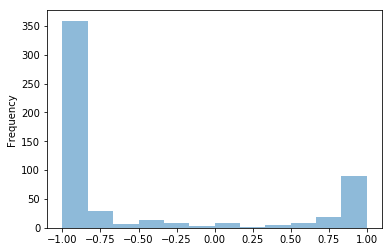

In [49]:
ax1 = CN['Sentiment Score'].plot.hist(bins=12, alpha=0.5)

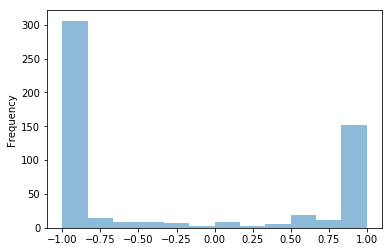

In [39]:
ax2 = US['Sentiment Score'].plot.hist(bins=12, alpha=0.5)